**LMCS** : Inicias con 10 puntos, conforme avance en la revisión iré quitando puntos. En la última celda está la calificación final de esta tarea.

**LMCS** : No pusiste tu nombre, la información de la tarea, ni del curso en este notebook!
- **Menos 0.1 pts (9.9)**

**LMCS**:  Falta la Explicación/Documentación.

- Aunque algunas cosas son claras, siempre es importante describir algunos detalles de la implementación.
- ¿Por qué modificas algunos parámetros de los gráficos a través de `plt.rc()`? (Supongo que es para una mejor visualización y siendo una materia de Visualización de la Información lo debes indicar). ¿Esto permitirá tener una mejor visualización?.
- Aplicas los métodos `drop()`, `sum()` y `groupby()` supongo que es por que así es mejor el manejo del Dataframe y se suma la información de países que están en renglones diferentes, además de que también eliminas algunas columnas que no usarás. Ah, y lo haces `inplace(True)`. 
- **Menos 0.1 pts (9.8)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [2]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
covid_global = pd.read_csv(url)
covid_global.drop(['Province/State', 'Lat', 'Long'], axis = 1, inplace = True)
# Agrupamos por país pues algunos países vienen desglosados por ciudad
covid_global = covid_global.groupby('Country/Region').sum()
covid_global.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,840,906,933,996,1026,1092,1176,1279,1351,1463
Albania,0,0,0,0,0,0,0,0,0,0,...,518,539,548,562,584,609,634,663,678,712
Algeria,0,0,0,0,0,0,0,0,0,0,...,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256
Andorra,0,0,0,0,0,0,0,0,0,0,...,673,696,704,713,717,717,723,723,731,738
Angola,0,0,0,0,0,0,0,0,0,0,...,19,19,24,24,24,24,25,25,25,25


# Punto 1

Para los países tomemos los 10 con más casos y a México.

**LMCS**:  Falta la Explicación/Documentación.

- Puedo usar el método `index()` para acceder a la lista de países por que usé el método `sum()` el cual ...
- **Menos 0.1 pts (9.7)**

In [3]:
total_casos = [covid_global.loc[pais][-1] for pais in covid_global.index]

totales = pd.DataFrame(data = {'Países':list(covid_global.index), 'Total':total_casos})
totales.sort_values(by = 'Total', ascending = False).head(10)

,Países,Total
171,US,938154
156,Spain,223759
84,Italy,195351
61,France,161644
65,Germany,156513
175,United Kingdom,149569
170,Turkey,107773
80,Iran,89328
36,China,83909
138,Russia,74588


In [4]:
paises = ['US', 'Spain', 'Italy', 'Germany', 'France', 'China', 
          'Iran', 'United Kingdom', 'Turkey', 'Switzerland', 'Mexico']

**LMCS**:  Aunque las fechas sin duda son importantes, la comparación que se pide en la tarea es a partir de que cada país tiene el primer caso confirmado, por esa razón se pide que se muevan a un origen común para ver como ha ido creciendo el número de casos y como las estrategias de mitigación afectan el crecimiento de los casos. 


In [5]:
# Diccionario de fechas, nos servirá más adelante y también para que todas las fechas tengan el mismo formato.

dict_fechas = {}

inicial_enero = 22
inicial_febrero = 1
inicial_marzo = 1
inicial_abril = 1
inicial_mayo = 1

for i in range(200):
    
    if i <= 10:     
        fecha = str(inicial_enero) + '/Ene/20'
        inicial_enero = inicial_enero + 1
        dict_fechas[i] = fecha
    elif i <= 10+29:
        fecha = str(inicial_febrero) + '/Feb/20'
        inicial_febrero = inicial_febrero + 1
        dict_fechas[i] = fecha
    elif i <= 10+29+31:
        fecha = str(inicial_marzo) + '/Mar/20'
        inicial_marzo = inicial_marzo + 1
        dict_fechas[i] = fecha
    elif i <= 10+29+31+30:
        fecha = str(inicial_abril) + '/Abr/20'
        inicial_abril = inicial_abril + 1
        dict_fechas[i] = fecha
    elif i <= 10+29+31+30+31:
        fecha = str(inicial_mayo) + '/May/20'
        inicial_mayo = inicial_mayo + 1
        dict_fechas[i] = fecha

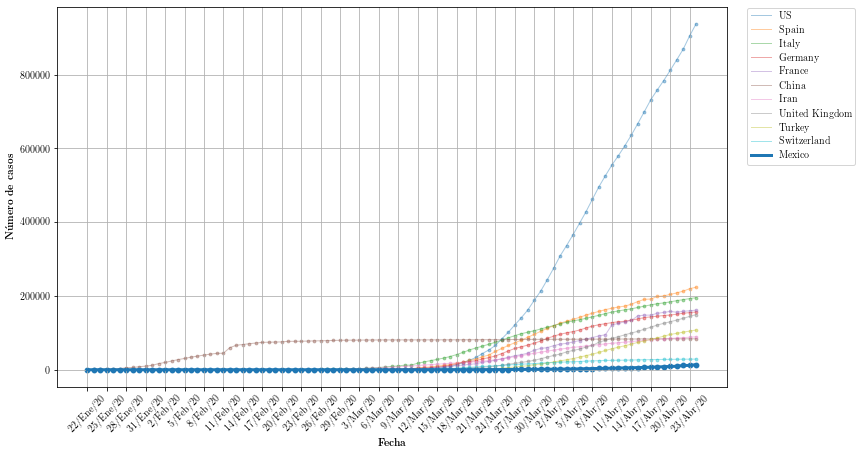

In [6]:
plt.figure(figsize=(12,7))

for pais in paises:
    
    if pais == 'Mexico':
        kwargs = {'alpha':1.0, 'linewidth':3.0}
    else:
        kwargs = {'alpha':0.4, 'linewidth':1.0}
    
    fechas = [dict_fechas[i] for i in range(len(covid_global.columns))]
    casos = covid_global.loc[pais]
    
    plt.scatter(fechas, casos, s = 8, label = '', **kwargs)
    plt.plot(fechas, casos, label = pais, **kwargs)
    plt.xticks(rotation = 45)
    plt.xticks(np.arange(0, len(fechas), step=3))

    plt.xlabel(r'\textbf{Fecha}')
    plt.ylabel(r'\textbf{Número de casos}')

# plt.yscale('log')
plt.legend(bbox_to_anchor=(1.2, 1.01), loc='upper right', ncol=1)
plt.grid()
#plt.show()
plt.savefig('david1.pdf')

**LMCS**: Comentarios con respecto a la gráfica anterior.

- No se pusieron los países en un origen común, respecto del primer caso.
- Es difícil identificar la gráfica de cada país.
- Si se pone el título correcto a la gráfica (por cierto no tiene título) no es necesario el `ylabel`.
- Tampoco es necesario poner el `xlabel` pues las fechas de manera implícita indican de que se trata.
- Tener repetición no es bueno, se repite el mes y el año muchas veces. Se puede eliminar todos los números 20 que corresponden al año, solo poner una vez el mes (habría que idear una manera).
- El font serif se ve muy bien en una imagen PDF, para una pantalla no es lo mejor y menos cuando se amontona el texto. En este caso es mejor dejar e defaul.  
- **Menos 0.5 pts (9.2)**

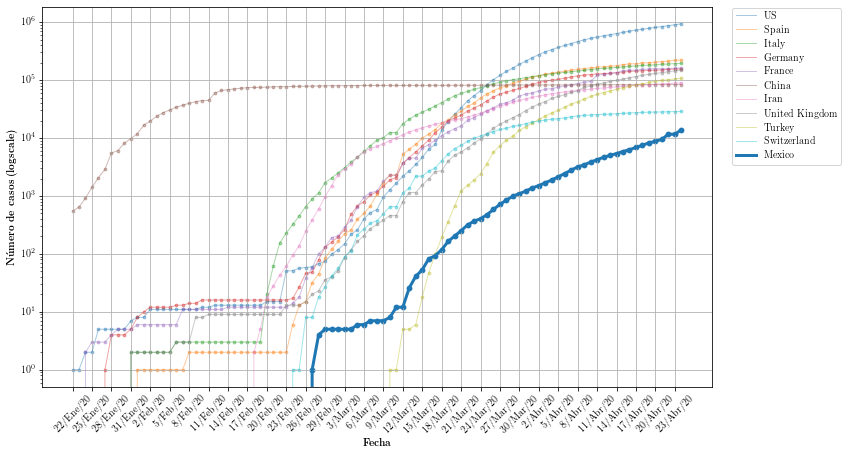

In [7]:
plt.figure(figsize=(12,7))

for pais in paises:
    
    if pais == 'Mexico':
        kwargs = {'alpha':1.0, 'linewidth':3.0}
    else:
        kwargs = {'alpha':0.4, 'linewidth':1.0}
    
    fechas = [dict_fechas[i] for i in range(len(covid_global.columns))]
    casos = covid_global.loc[pais]
    
    plt.scatter(fechas, casos, s = 8, label = '', **kwargs)
    plt.plot(fechas, casos, label = pais, **kwargs)
    plt.xticks(rotation = 45)
    plt.xticks(np.arange(0, len(fechas), step=3))

    plt.xlabel(r'\textbf{Fecha}')
    plt.ylabel(r'\textbf{Número de casos (logscale)}')

plt.yscale('log')
plt.legend(bbox_to_anchor=(1.2, 1.01), loc='upper right', ncol=1)
plt.grid()
#plt.show()
plt.savefig('david2.pdf')

**LMCS**: Comentarios con respecto a la gráfica anterior.

- Es la misma gráfica que arriba, solo en escala semilogarítmica.
- Se distinguen un poco mejor las gráficas, pero se sufre de lo mismo que la gráfica anterior.

# Punto 2

Ahora para hacer el modelo tenemos que 

$$ I_{n+1} = (E+1)I_{n}, $$

donde se cumple que 

- Se cumple que $E + 1 \geq 1$.
- Cuando $E = 0$ se tiene que $I_{n+1} = I_{n}$ por lo que no habrá incremento en el día siguiente.
- Cuando $E = 1$ se tiene que $I_{n+1} = 2I_{n}$ por lo que el incremento será del doble al día siguiente.
- Se puede ver que $(E + 1) = \frac{I_{n+1}}{I_{n}}$, por lo tanto, si tenemos información de $I_{n}$ e $I_{n+1}$ entonces es posible conocer el valor de $(E + 1)$ para el día $n + 1$.

Para calcular $E+1$ tomamos un promedio de los distintos $\frac{I_{n+1}}{I_{n}}$ empezando por el $n$ tal que $I_{n} \geq 20$.

In [8]:
def fit_and_predict(data, pais = 'Mexico', umbral = 50, adelante = 0):
    """
    Esta función ajusta los datos al modelo I_(n+1) = (E+1)I_n.
    
    data: pandas.DataFrame, arreglo con los datos a ajustar.
    pais: str, opcional, país al cuál queremos ajustar sus datos, default: 'Mexico'.
    umbral: int, opcional, número de casos a partir del cual empezaremos a calcular
            (E+1), default: 50.
    adelante: int, opcional, número de días hacia adelante que queremos predecir a 
              partir del último día, default: 0.
              
    Returns: inicio: int, día en el que hubo más de 'umbral' pacientes confirmados.
             fechas, data.loc['Mexico']: fechas y casos reales .
             fechas_pred, ys_pred: casos predichos con el modelo y sus respectivas fechas.
    """
    
    fin = len(data.columns)
    
    ys = data.loc[pais]
    
    # Encontramos el día en que hubo más de 20 pacientes confirmados
    inicio = 0
    while ys[inicio] < umbral:
        inicio = inicio+1
           
    es = [ys[i]/ys[i-1] for i in range(inicio,fin) if ys[i-1] != 0]
    
    e_1 = np.mean(es)
    
    print('E+1 = {:.3f}'.format(e_1))
    
    xs_pred = np.array([i for i in range(inicio, fin + adelante)])
    ys_pred = [ys[inicio]*(e_1)**(i-inicio) for i in range(inicio, fin+adelante)]
    
    fechas = [dict_fechas[i] for i in range(len(data.columns))]
    fechas_pred = [dict_fechas[x] for x in xs_pred]
       
    return inicio, fechas, data.loc[pais], fechas_pred, ys_pred

In [9]:
inicio, xs, ys, xs_pred, ys_pred = fit_and_predict(covid_global, umbral = 50, adelante = 2)

E+1 = 1.156


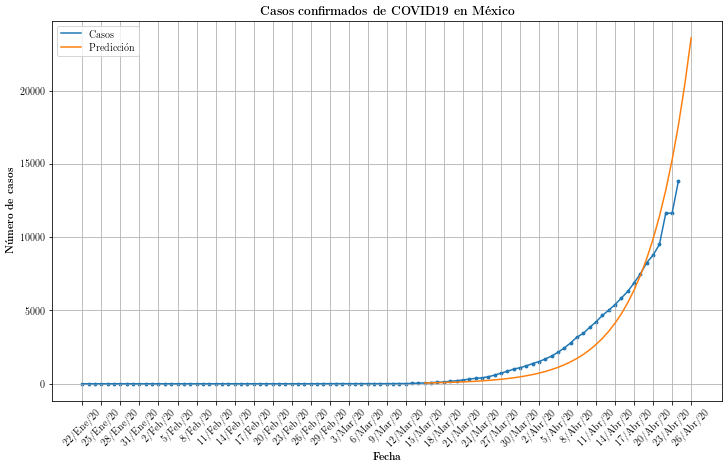

In [10]:
plt.figure(figsize=(12,7))

plt.scatter(xs, ys, s = 8, label = '')
plt.plot(xs, ys, label = 'Casos')
plt.plot(xs_pred, ys_pred, label = 'Predicción')

plt.xticks(rotation=45)
plt.xticks(np.arange(0, len(xs_pred) + inicio, step=3))

plt.grid()
plt.legend()

plt.xlabel(r'\textbf{Fecha}')
plt.ylabel(r'\textbf{Número de casos}')
plt.title(r'\textbf{Casos confirmados de COVID19 en México}')

plt.show()

In [11]:
xs_pred1 = xs_pred
ys_pred1 = ys_pred

Jugando con los valores del umbral (a partir de cuántos casos el modelo se ajusta mejor) con alrededor de 50 parece ser lo mejor, así, obtenemos que $E+1 = 1.199$, de modo que de un día al otro esperamos que haya 1.199 de veces nuevos casos. Además, al 8 de abril predecimos que habrá 4092 casos. Sin embargo, no se ajusta tan bien, tratemos de usar una función exponencial más general, la cuál es

$$ f(x | a,b,c) = ba^{x} + c. $$

Entonces tratemos de ajustar los datos a

$$ f(x | a,b,c) = e^{ax + b} + c, $$ 

recordemos que $a^{x} = e^{x\log a} \ (a > 0)$, de modo que nuestro modelo es equivalente a

$$ \begin{align*}
f(x | a,b,c) &= e^{ax + b} + c\\ 
&= e^{b}e^{ax} + c \\
&= b'e^{x\log a'} + c \quad \text{donde } \log a' = a, \ b' = e^{b} \\
&= b' a'^{x} + c,
\end{align*} $$

que es lo que queremos (daba valores extraños al ajustar $b' a'^{x} + c$, al ponerla como $e^{ax + b} + c$ salía bien).

In [12]:
def func(x, a, b, c):
    """
    Función exponencial a ajustarse.
    """
    return np.exp(a*x + b) + c

In [13]:
def fit_and_predict_exp(data, pais = 'Mexico', inicio = 0, adelante = 0):
    """
    Esta función ajusta los datos al modelo f(x | a,b,c) = ba^{x} + c.
    
    data: pandas.DataFrame, arreglo con los datos a ajustar.
    pais: str, opcional, país al cuál queremos ajustar sus datos, default: 'Mexico'.
    umbral: int, opcional, número de casos a partir del cual empezaremos a calcular
            (E+1), default: 50.
    adelante: int, opcional, número de días hacia adelante que queremos predecir a 
              partir del último día, default: 0.
              
    Returns: inicio: int, día en el que hubo más de 'umbral' pacientes confirmados.
             fechas, data.loc['Mexico']: fechas y casos reales .
             fechas_pred, ys_pred: casos predichos con el modelo y sus respectivas fechas.
    """
    
    
    fin = len(data.columns)
    
    xs = [i for i in range(inicio,fin)]
    ys = data.loc[pais][inicio:fin]
    
    popt, pcov = curve_fit(func, xs, ys)
    a,b,c = popt
    
    print('a = {:.3f}, b = {:.3f}, c = {:.3f}'.format(a,b,c))
    
    xs_pred = np.array([i for i in range(inicio, fin + adelante)])
    ys_pred = func(xs_pred, a,b,c)
    
    fechas = [dict_fechas[i] for i in range(len(data.columns))]
    fechas_pred = [dict_fechas[x] for x in xs_pred]
    
    return fechas, data.loc[pais], fechas_pred, ys_pred

In [14]:
inicio = 0
adelante = 2 # tratemos de predecir 2 días adelante

xs, ys, xs_pred, ys_pred = fit_and_predict_exp(covid_global, pais = 'Mexico', inicio = inicio, adelante = adelante)

a = 0.094, b = 0.668, c = -89.796


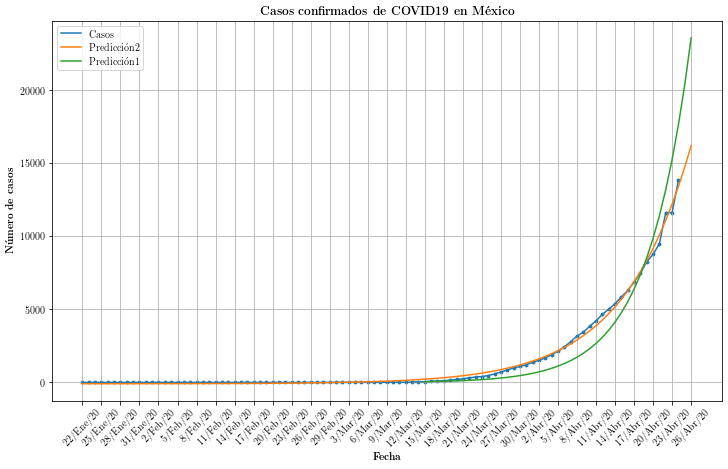

In [15]:
plt.figure(figsize=(12,7))

plt.scatter(xs, ys, s = 8, label = '')
plt.plot(xs, ys, label = 'Casos')
plt.plot(xs_pred, ys_pred, label = 'Predicción2')
plt.plot(xs_pred1, ys_pred1, label = 'Predicción1')

plt.xticks(rotation=45)
plt.xticks(np.arange(0, len(xs_pred) + inicio, step=3))

plt.grid()
plt.legend()

plt.xlabel(r'\textbf{Fecha}')
plt.ylabel(r'\textbf{Número de casos}')
plt.title(r'\textbf{Casos confirmados de COVID19 en México}')

plt.show()

Así se ajusta mucho mejor, además, predecimos que para el 8 de abril habrá 3252 casos.

**LMCS**: Comentarios con respecto a la gráfica anterior.

- Ya que hiciste los dos modelos, agregué algunas líneas para compararlos. Efectivamente, el modelo usando una regresión se ajusta mejor. ¿Podrías calcular el error de cada una en términos de un RMS?
- Esta gráfica tiene los mismos peros que te comenté respecto de la primer gráfica.

# Mapa

Ahora hagamos un mapa (estoy aprendiendo a usar la biblioteca **folium** porque la necesito para mi proyecto) de cómo se va propagando el virus en el mundo en las últimas semanas.

In [ ]:
import folium
from folium.plugins import TimeSliderChoropleth
from folium.plugins import MousePosition
import os
import geojson

## Estandarizar nombres

Los nombres de algunos países en el geojson que uso para hacer el mapa y el del dataset del COVID19 no coinciden, por lo que hay que hacer que coincidan, lo cual hago con un diccionario.

In [ ]:
dir_geojson_to_covid = {'Bahamas':'The Bahamas', 
                       'Burma':'Myanmar', 
                       'Cabo Verde':'Cape Verde',
                       'Congo (Brazzaville)':'Republic of Congo',
                       'Congo (Kinshasa)':'Democratic Republic of the Congo',
                       "Cote d'Ivoire":'Ivory Coast',
                       'Czechia':'Czech Republic',
                       'Eswatini':'Swaziland',
                       'Guinea-Bissau':'Guinea Bissau',
                       'Holy See':'Vatican',
                       'Korea, South':'South Korea',
                       'North Macedonia':'Macedonia',
                       'Serbia':'Republic of Serbia',
                       'Taiwan*':'Taiwan',
                       'Tanzania':'United Republic of Tanzania',
                       'Timor-Leste':'East Timor',
                       'US':'United States of America',
                       'West Bank and Gaza':'Palestine'}

También hay datos de dos cruceros que tenían personas afectadas, pero los quitaré porque no son países.

In [ ]:
covid_global.drop(['Diamond Princess','MS Zaandam'], inplace = True)
covid_global = covid_global.reset_index()

In [ ]:
def same_name(x):
    if x in dir_geojson_to_covid.keys():
        return dir_geojson_to_covid[x]
    else:
        return x

In [ ]:
covid_global['Country/Region'] = covid_global['Country/Region'].apply(same_name)

In [ ]:
covid_global = covid_global.set_index('Country/Region')
covid_global.head()

In [ ]:
n = len(covid_global.columns)

datetime_index = pd.date_range(start='2020-01-22', periods=n, freq = 'D')
dt_index_epochs = datetime_index.astype(np.int64) // 10**9
dt_index = dt_index_epochs.astype('U10')

Leemos los datos del geojson, que tiene las fronteras de todos los países del mundo

In [ ]:
import geopandas as gpd

gdf = gpd.read_file('https://raw.githubusercontent.com/datasets/geo-countries/master/data/countries.geojson')
gdf.head()

También necesitamos un mapa de colores, lo hago asimétrico debido que si lo hago simétrico sólo se notan los países con mayor número de casos (China, US, Italia, etc) y los demás países parecen no estar afectados, lo cual no es cierto.

In [ ]:
import branca.colormap as cm

hoy = covid_global.columns[-1]

colormap = cm.LinearColormap(colors = ['#12C600', '#DFE600', '#F8900B', '#E90000', '#E90000'],
                             index = [0, 2000, 50000, 100000, 300000],
                             vmin = 0, vmax = covid_global[hoy].max())

colormap

In [ ]:
dict_country = dict(zip(gdf.index, gdf['ADMIN']))

In [ ]:
n = len(covid_global.columns)

styledata = {}

for country in gdf.index:
    
    if dict_country[country] in covid_global.index:
        casos = covid_global.loc[dict_country[country]]
        colores = [colormap(x) for x in casos]
    else:
        # A los que no tienen información les pongo negro de color
        colores = ['000000' for _ in range(n)]        
    
    df = pd.DataFrame(
        {'color': colores,
         'opacity': np.ones(n)},
        index=dt_index
    )
    styledata[country] = df

In [ ]:
styledict = {
    str(country): data.to_dict(orient='index') for
    country, data in styledata.items()
}

En el siguiente mapa se muestra cómo va evolucionando la propagación del virus, empieza en China y luego se propaga a Europa, para después propagarse a el resto del mundo (de los países en negro no hay información). El mapa se ve mejor en el archivo 'Mapa/TimeSliderChoropleth.html'.

**Quitar los comentarios para hacer el mapa (el mapa pesa como 20 MB y no me dejaba subirlo a la plataforma.)**

In [ ]:
m = folium.Map([0, 0], tiles='OpenStreetMap', zoom_start=2)

MousePosition().add_to(m)

g = TimeSliderChoropleth(
    gdf.to_json(),
    styledict=styledict,
    overlay = False,
    control = False, 
    show = False
).add_to(m)

colormap.caption = 'Casos confirmados'
colormap.add_to(m)

m.save(os.path.join('Mapa', 'TimeSliderChoropleth.html'))

m

In [ ]:
#!jt -r
#!jt -t chesterish -T -N -kl

**LMCS**: Comentarios finales.

- Muy buen trabajo de análisis.
- Faltó trabajar un poco en la presentación de las gráficas, sobre todo de las primeras dos, pues no se ve algo que sea interesante (preattentive feature).
- Usas muchas bibliotecas no estándares y no es fácil ponerlas en funcionamiento. 
    - Desde cosas muy sencillas como el font.
    - Hasta cosas complicadas como el mapa que deseabas mostrar, el cual por cierto pude obtener pero sin información correcta (probablemente por que faltó alguna biblioteca). 
    - Mi recomendación es que trates de hacer uso de lo más estándar, pues cuando distribuyes tus desarrollos evitas problemas con el usuario final.
    
- **Calificación final de esta tarea: 9.2**